### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [1]:
# Load the dataset
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [2]:
# variables
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
# Descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Since BMI, BloodPressure, Glucose, Insulin, SkinThickness cannot be zero we can replace zero value with mean of the data

df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


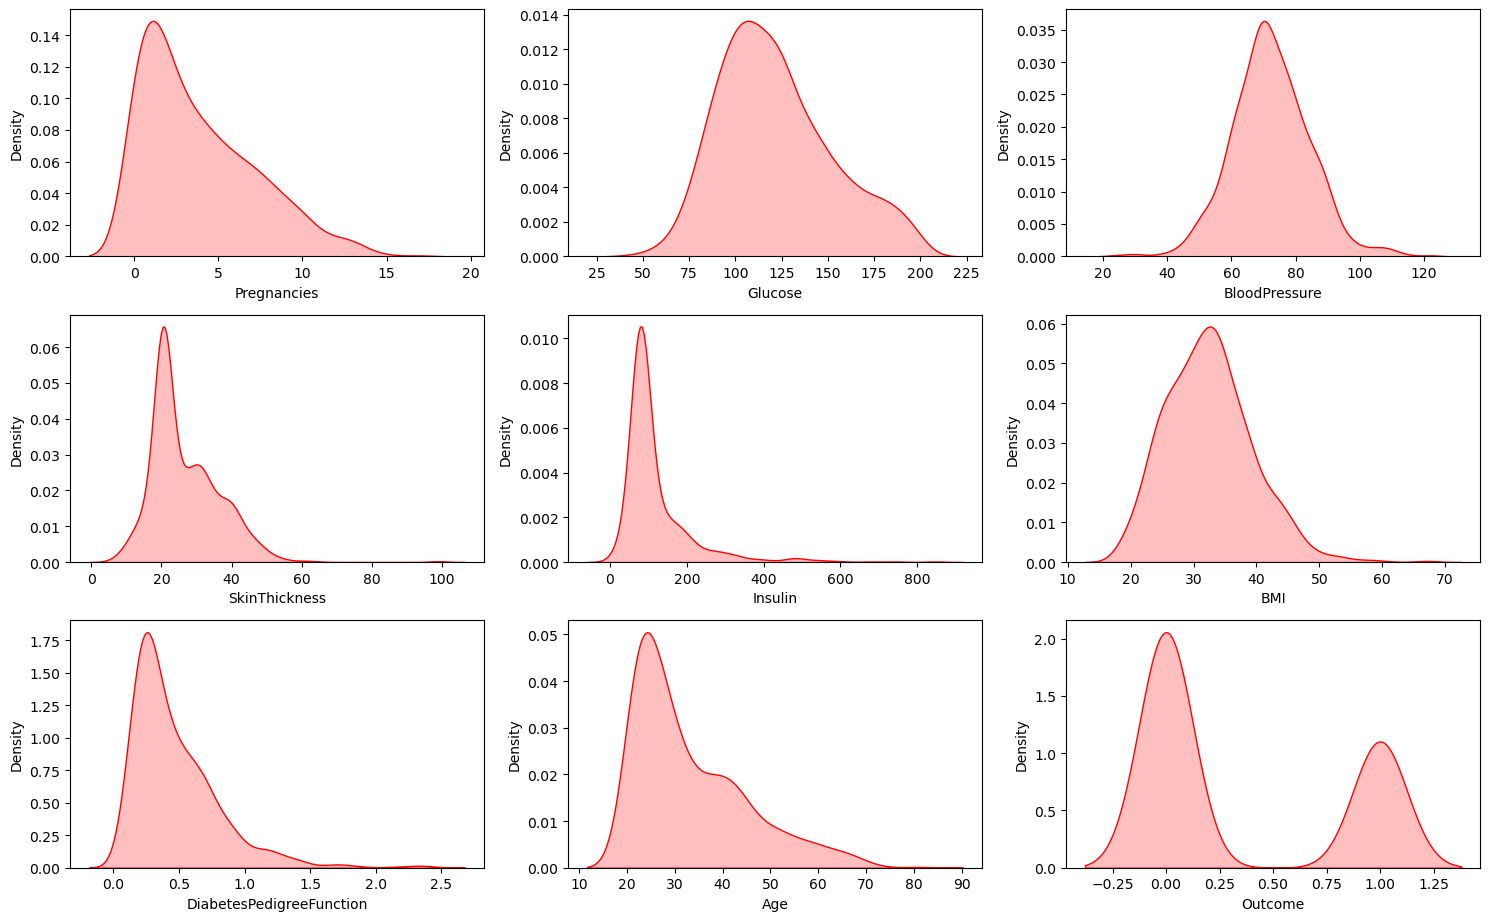

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Distribution of the variables
plt.figure(figsize=(15, 15))
for i in range(0, len(df.columns)):
    plt.subplot(5,3, i+1)
    sns.kdeplot(x = df[df.columns[i]], shade = True, color='r')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

<AxesSubplot: >

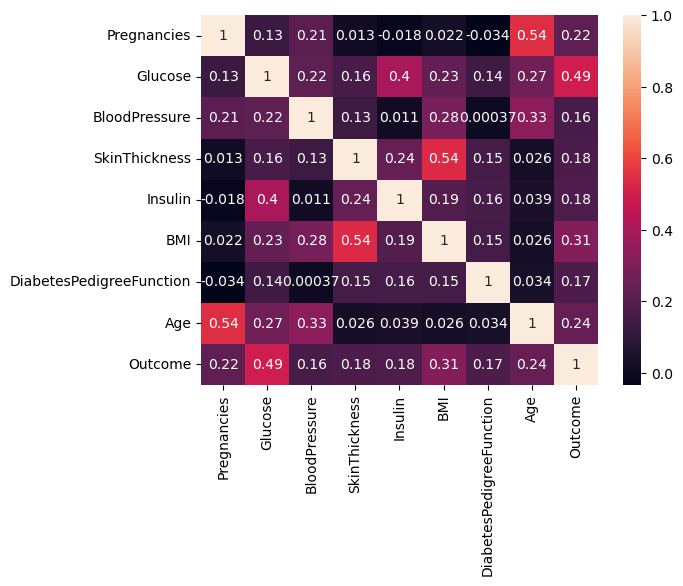

In [7]:
# Relationship between variables 
sns.heatmap(df.corr(), annot=True)

### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [8]:
# check the missing value present in the dataset or not
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no missing value present in the dataset.

<AxesSubplot: >

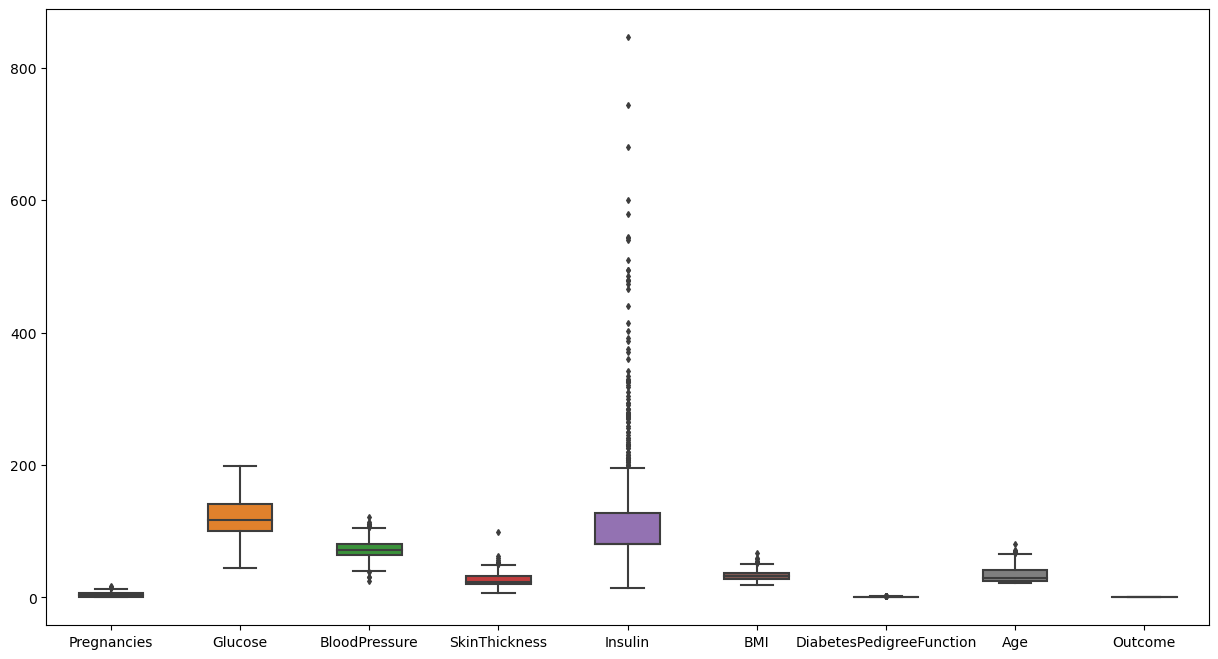

In [9]:
# check for the outliers
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=df, width=0.5, ax = ax, fliersize=3)

We can see that outliers are present in the dataset.

Most outliers are present in insulin.

In [10]:
import numpy as np

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# remove the outliers
for feature in df.columns:
    df = pd.DataFrame(remove_outliers(df, feature))

In [11]:
# check the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               603 non-null    int64  
 1   Glucose                   603 non-null    float64
 2   BloodPressure             603 non-null    float64
 3   SkinThickness             603 non-null    float64
 4   Insulin                   603 non-null    float64
 5   BMI                       603 non-null    float64
 6   DiabetesPedigreeFunction  603 non-null    float64
 7   Age                       603 non-null    int64  
 8   Outcome                   603 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 47.1 KB


There is no categorical value present in this dataset.

### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


In [13]:
# Independent and dependent feature

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [14]:
# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [15]:
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1, 2, 3, 4, 5],
    'max_features':['auto', 'sqrt', 'log2']
}

from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()
clf = GridSearchCV(classifier, param_grid=parameters, cv = 5, scoring='accuracy')

In [16]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [17]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [18]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='sqrt', splitter='best')

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [20]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Prediction 
y_pred = clf.predict(X_test)

# calculate accuracy, precision, recall, and F1 score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.7483443708609272
Precision:  0.7857142857142857
Recall:  0.4074074074074074
F1_score:  0.5365853658536585
[[91  6]
 [32 22]]


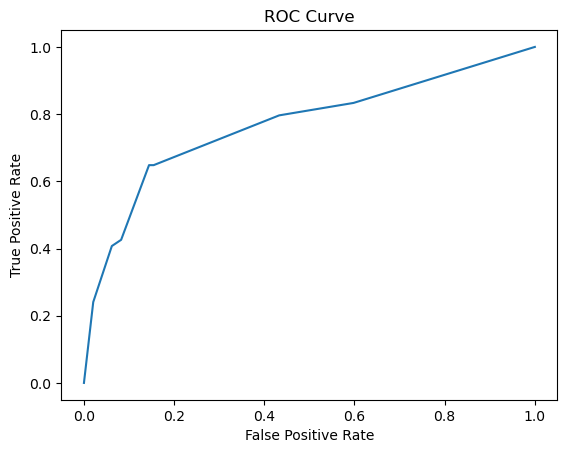

In [21]:
# Calculate the ROC curve and AUC score
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# auc = roc_auc_score(y_test, y_pred_prob)
# print("AUC score:", auc)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

[Text(0.4431818181818182, 0.9166666666666666, 'x[1] <= 106.5\nentropy = 0.86\nsamples = 452\nvalue = [324, 128]'),
 Text(0.22727272727272727, 0.75, 'x[2] <= 84.5\nentropy = 0.393\nsamples = 181\nvalue = [167, 14]'),
 Text(0.12121212121212122, 0.5833333333333334, 'x[6] <= 0.674\nentropy = 0.327\nsamples = 167\nvalue = [157, 10]'),
 Text(0.06060606060606061, 0.4166666666666667, 'x[5] <= 26.35\nentropy = 0.246\nsamples = 147\nvalue = [141, 6]'),
 Text(0.030303030303030304, 0.25, 'entropy = 0.0\nsamples = 51\nvalue = [51, 0]'),
 Text(0.09090909090909091, 0.25, 'x[6] <= 0.346\nentropy = 0.337\nsamples = 96\nvalue = [90, 6]'),
 Text(0.06060606060606061, 0.08333333333333333, 'entropy = 0.491\nsamples = 56\nvalue = [50, 6]'),
 Text(0.12121212121212122, 0.08333333333333333, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.18181818181818182, 0.4166666666666667, 'x[4] <= 89.0\nentropy = 0.722\nsamples = 20\nvalue = [16, 4]'),
 Text(0.15151515151515152, 0.25, 'entropy = 0.0\nsamples = 13\n

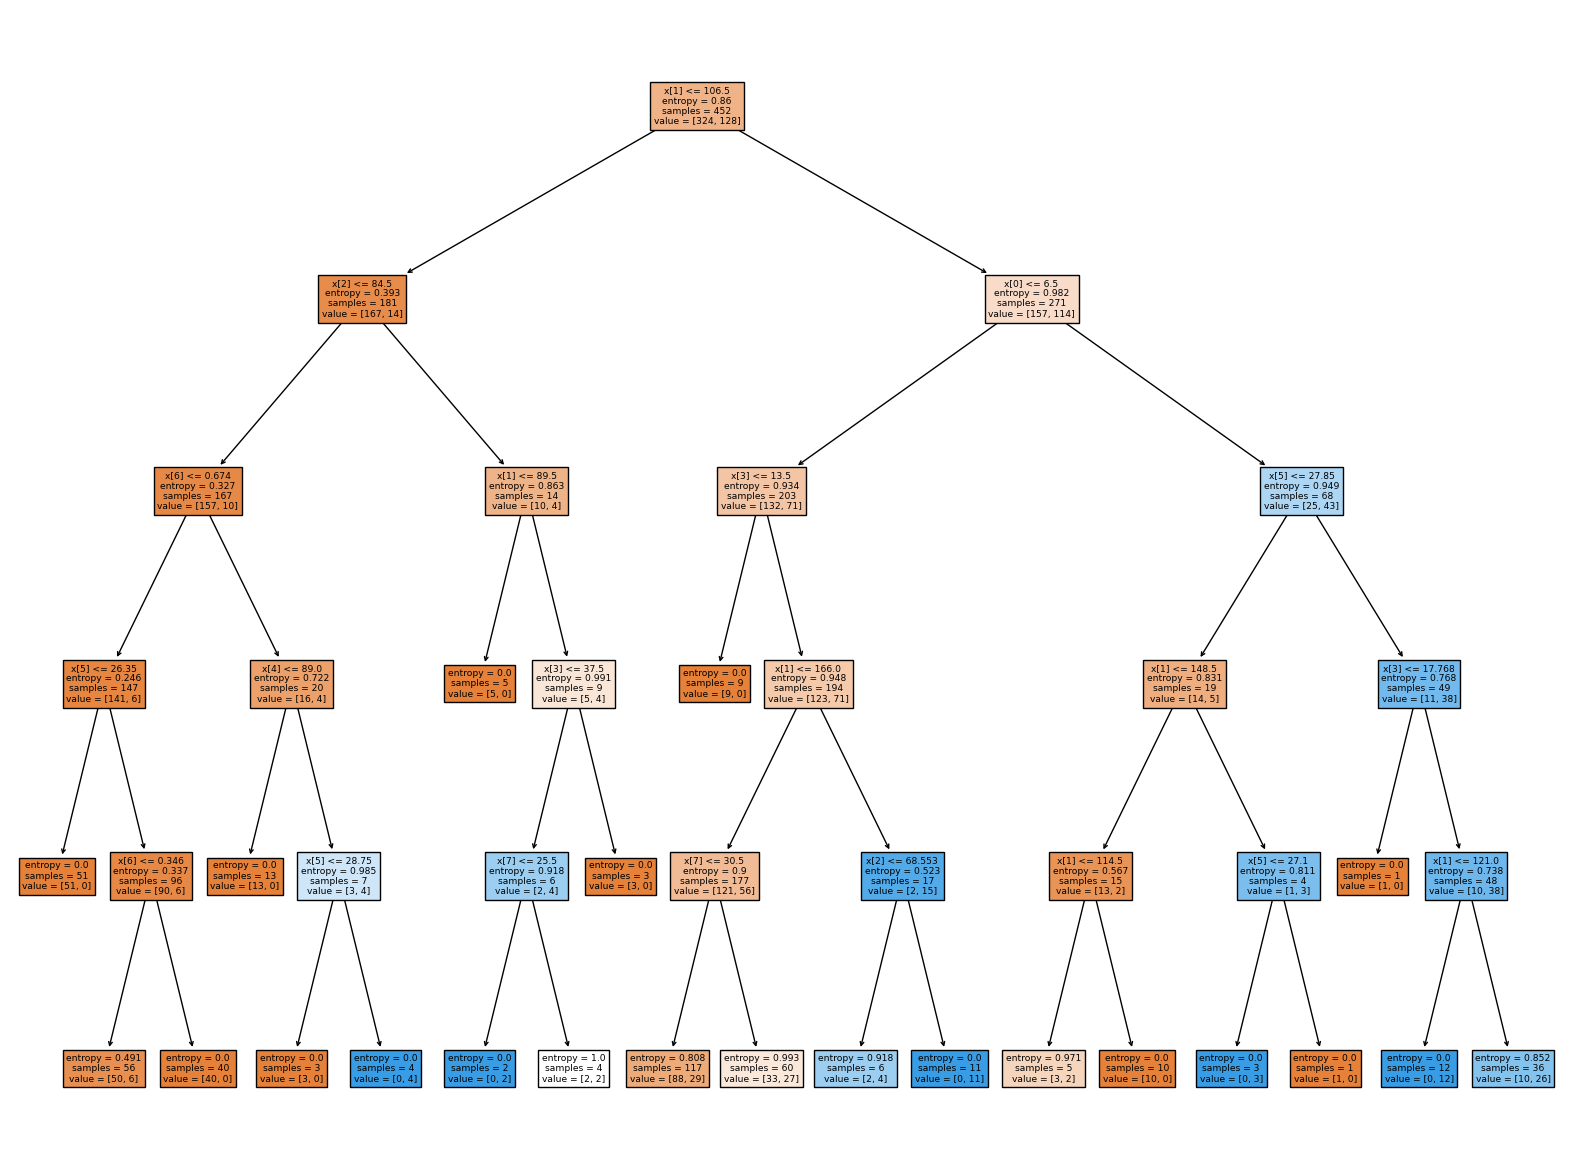

In [22]:
from sklearn import tree
plt.figure(figsize=(20, 15))
tree.plot_tree(clf, filled=True)

In [23]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30


From the decision tree the most important variables is Glucose. Because the variables with the most significant impact on the prediction will appear higher up in the tree.

The threshold value for split is 106.5, this means that if a person's blood glucose level is greater than 106.5, they will be classified as having diabetes, and if their blood glucose level is less than or equal to 106.5, they will be classified as not having diabetes.

In first depth the important variables are BloodPressure and Pregnancies with threshold values : 84.5 and 6.5

In second depth the important variables with their threshold values are:</br>
DiabetesPedigreeFunction - 0.674 , Glucose - 89.5 , SkinThickness - 13.5, BMI - 27.85

In third depth the important variables with their threshold values are:</br>
BMI - 26.35, Insulin - 89.0, SkinThickness - [37.5, 17.768], Glucose - [166.0, 148.5]

In fourth depth the important variables with their threshold values are:</br>
DiabetesPedigreeFunction - 0.346, BMI - [28.75, 27.1], age - [25.5, 30.5], BloodPressure - 68.553, Glucose - [114.5, 121.0]

In fifth depth there are leaf nodes through we can predict either person is diabetic or not.

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

To perform sensitivity analysis and scenario testing, we can vary the parameters of the model and observe how the performance metrics changes. For example, we can vary the maximum depth of the decision tree, the minimum number of samples required to split a node, or the criterion used to measure the quality of a split. 

In [23]:
import numpy as np

# Vary the maximum depth of the decision tree
for max_depth in [1, 2, 3, 4, 5]:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Max depth:', max_depth)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1-score:', f1_score(y_test, y_pred))
    print()

# Vary the minimum number of samples required to split a node
for min_samples_split in [2, 3, 4, 5, 6]:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Min samples split:', min_samples_split)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1-score:', f1_score(y_test, y_pred))
    print()


Max depth: 1
Accuracy: 0.7483443708609272
Precision: 0.6666666666666666
Recall: 0.5925925925925926
F1-score: 0.627450980392157

Max depth: 2
Accuracy: 0.7549668874172185
Precision: 0.7575757575757576
Recall: 0.46296296296296297
F1-score: 0.5747126436781609

Max depth: 3
Accuracy: 0.7615894039735099
Precision: 0.75
Recall: 0.5
F1-score: 0.6

Max depth: 4
Accuracy: 0.7947019867549668
Precision: 0.7169811320754716
Recall: 0.7037037037037037
F1-score: 0.7102803738317758

Max depth: 5
Accuracy: 0.7682119205298014
Precision: 0.6792452830188679
Recall: 0.6666666666666666
F1-score: 0.6728971962616822

Min samples split: 2
Accuracy: 0.7218543046357616
Precision: 0.6304347826086957
Recall: 0.5370370370370371
F1-score: 0.5800000000000001

Min samples split: 3
Accuracy: 0.7284768211920529
Precision: 0.6326530612244898
Recall: 0.5740740740740741
F1-score: 0.6019417475728156

Min samples split: 4
Accuracy: 0.7019867549668874
Precision: 0.6
Recall: 0.5
F1-score: 0.5454545454545454

Min samples split: